In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [93]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
lead_origin=df['Lead Origin'].value_counts().reset_index()

<Axes: xlabel='Lead Origin', ylabel='count'>

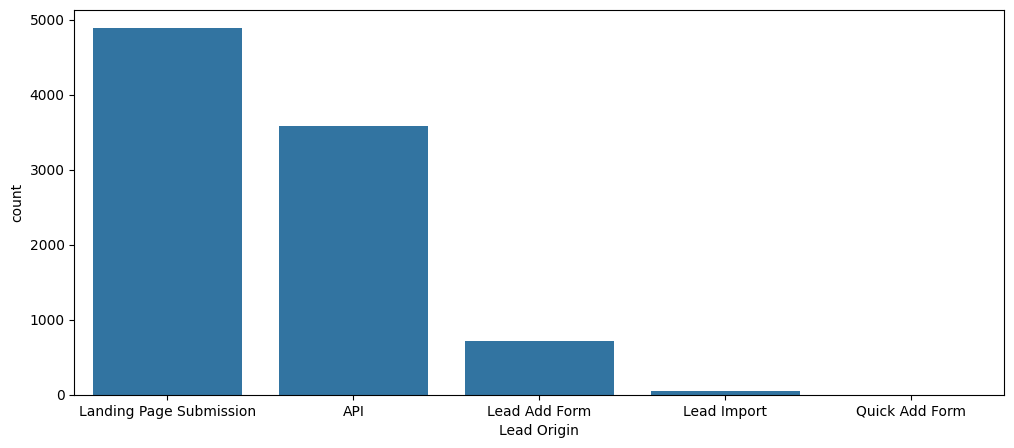

In [8]:
plt.figure(figsize=(12,5))
sns.barplot(data=lead_origin,x='Lead Origin',y='count')

In [11]:
df['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

#### looks like the target class is some what balanced.

In [13]:
df['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

#### using domain knowledge and common sense there are few columns that does not play significant role to predict wether a particular lead turning into potential customer

#### cloumns like => do not call ,do not email are general purpose columns for communication so they do not play much significant role.

In [9]:
lead_origin_prop=df.groupby(['Lead Origin','Converted']).count().reset_index()

<Axes: xlabel='Lead Origin', ylabel='Prospect ID'>

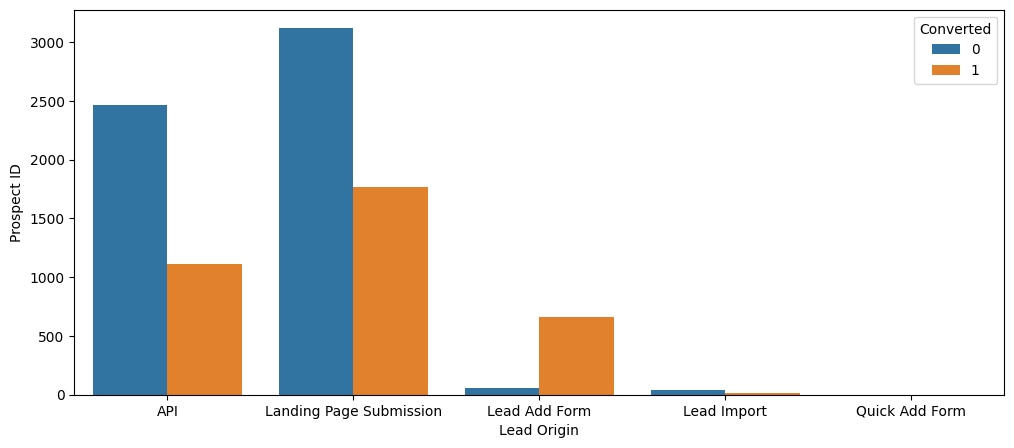

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(data=lead_origin_prop,x='Lead Origin',y='Prospect ID',hue='Converted')

#### the propotion of lead turning into customer are higher for lead originating from lead add form

In [35]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
lead_source=df.groupby(['Lead Source','Converted']).count().reset_index()

In [12]:
t=lead_source[lead_source['Prospect ID']>5]

In [13]:
t

,Lead Source,Converted,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,Direct Traffic,0,1725,1725,1725,1725,1725,1725,1725,1725,...,1725,1166,1667,870,870,870,870,1725,1725,1725
3,Direct Traffic,1,818,818,818,818,818,818,818,818,...,818,707,814,406,406,406,406,818,818,818
4,Facebook,0,42,42,42,42,42,22,42,22,...,42,33,42,41,41,41,41,42,42,42
5,Facebook,1,13,13,13,13,13,9,13,9,...,13,13,13,13,13,13,13,13,13,13
6,Google,0,1721,1721,1721,1721,1721,1721,1721,1721,...,1721,1033,1423,980,980,980,980,1721,1721,1721
7,Google,1,1147,1147,1147,1147,1147,1147,1147,1147,...,1147,1015,1095,663,663,663,663,1147,1147,1147
10,Olark Chat,0,1307,1307,1307,1307,1307,1305,1307,1305,...,1307,513,534,678,678,678,678,1307,1307,1307
11,Olark Chat,1,448,448,448,448,448,448,448,448,...,448,380,384,244,244,244,244,448,448,448
12,Organic Search,0,718,718,718,718,718,718,718,718,...,718,489,626,405,405,405,405,718,718,718
13,Organic Search,1,436,436,436,436,436,436,436,436,...,436,381,404,227,227,227,227,436,436,436


<Axes: xlabel='Lead Source', ylabel='Prospect ID'>

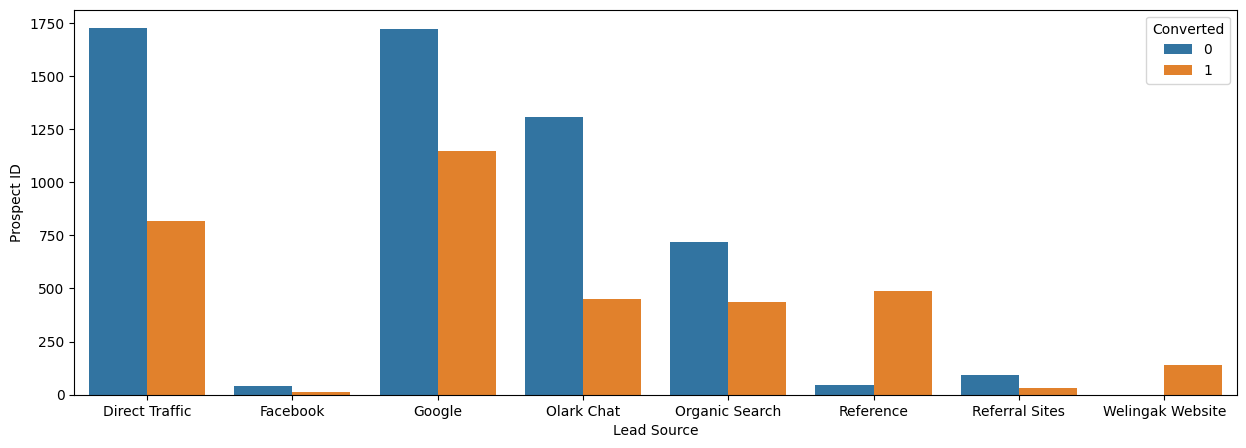

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(data=t,x='Lead Source',y='Prospect ID',hue='Converted')

In [15]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [94]:
country=df['Country'].value_counts().reset_index()

In [98]:
import plotly.express as px
fig = px.bar(country[:9], x='Country', y='count', color='Country', height=400)
fig.show()

In [71]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
know_x=df['How did you hear about X Education']

In [19]:
know_x.fillna("no response",inplace=True)

In [20]:
know_x=know_x.value_counts().reset_index()

In [21]:

import plotly.express as px
fig = px.bar(know_x, x='How did you hear about X Education', y='count', height=400)
fig.show()

<Axes: xlabel='Lead Source', ylabel='Prospect ID'>

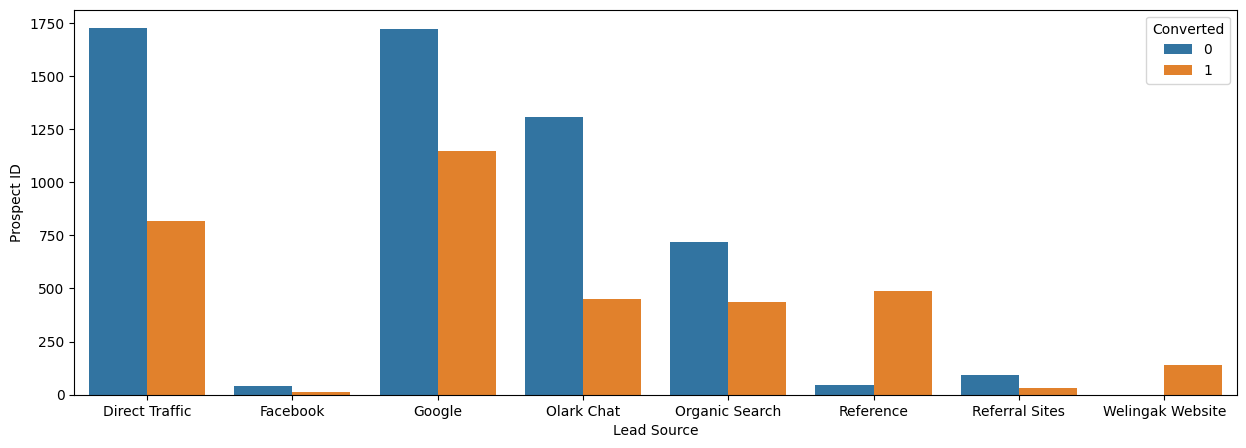

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(data=t,x='Lead Source',y='Prospect ID',hue='Converted')

In [23]:
income=df['What is your current occupation'].value_counts().reset_index()
income

,What is your current occupation,count
0,Unemployed,5600
1,Working Professional,706
2,Student,210
3,Other,16
4,Housewife,10
5,Businessman,8


<Axes: xlabel='What is your current occupation', ylabel='count'>

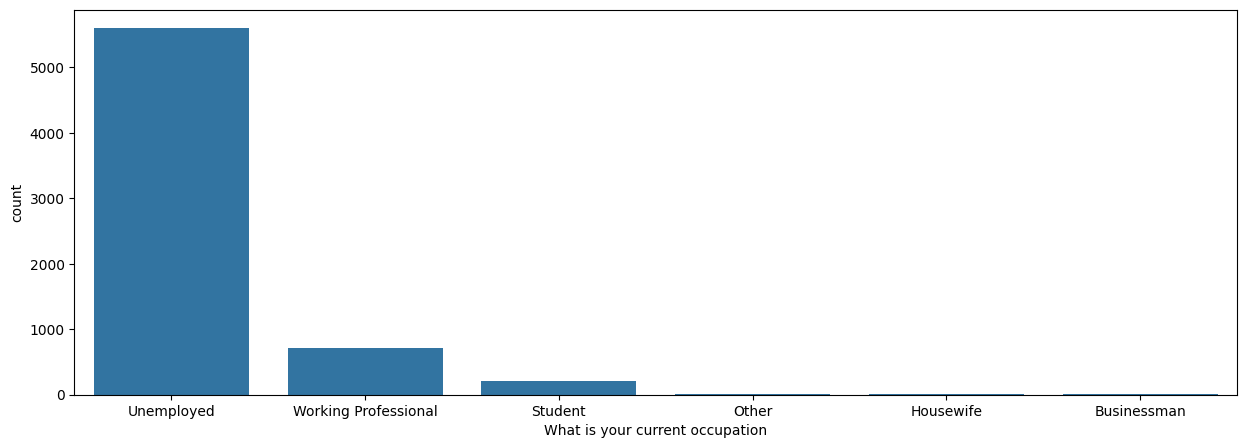

In [107]:
plt.figure(figsize=(15,5))
sns.barplot(data=income, x='What is your current occupation', y='count')

In [102]:
d=df['What matters most to you in choosing a course'].value_counts().reset_index()
d

,What matters most to you in choosing a course,count
0,Better Career Prospects,6528
1,Flexibility & Convenience,2
2,Other,1


<Axes: xlabel='What matters most to you in choosing a course', ylabel='count'>

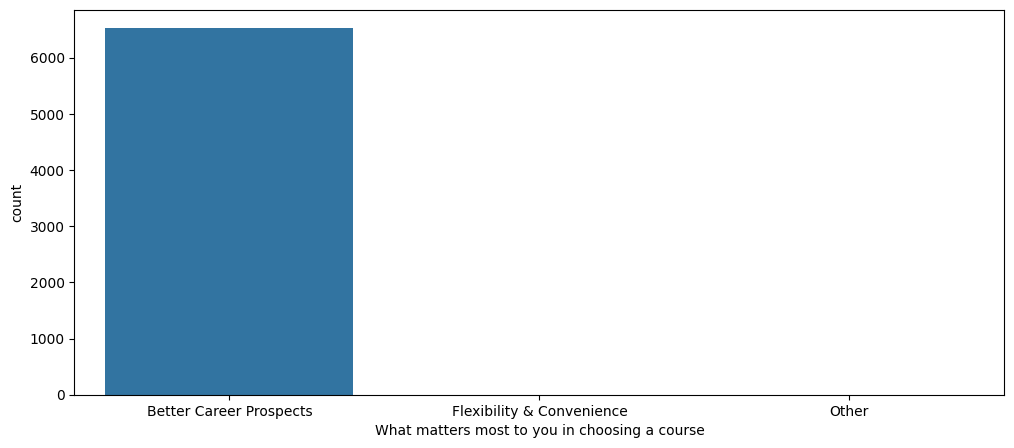

In [104]:
plt.figure(figsize=(12,5))
sns.barplot(data=d,x='What matters most to you in choosing a course',y='count')

In [26]:
lead_st=df.groupby(['Converted','What is your current occupation']).count().reset_index()

In [115]:
lead_st
plt.figure(figsize=(15,5))
fig = px.bar(lead_st, x='What is your current occupation', y='Prospect ID',color='Converted',height=400)
fig.show()

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='What is your current occupation', ylabel='Prospect ID'>

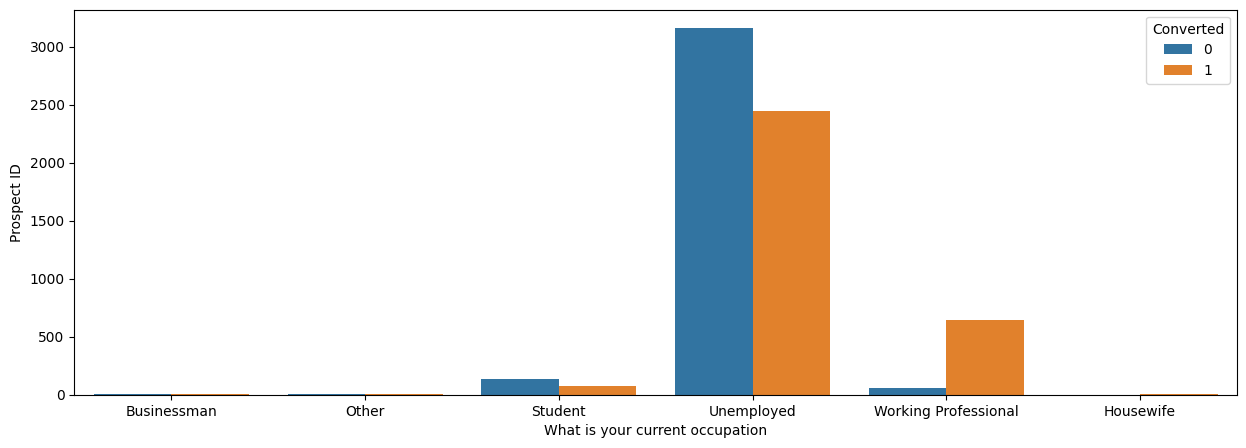

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=lead_st,x='What is your current occupation',y='Prospect ID',hue='Converted')

In [28]:
tags=df.groupby(['Converted','Tags']).count().reset_index()

In [32]:
tags_conv=tags[(tags['Prospect ID']>30) & (tags['Converted']==1)]

In [33]:
tags_conv

,Converted,Tags,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
25,1,Busy,105,105,105,105,105,105,105,105,...,105,105,105,50,50,50,50,105,105,105
26,1,Closed by Horizzon,356,356,356,356,356,356,299,356,...,356,356,356,214,214,214,214,356,356,356
34,1,Lost to EINS,171,171,171,170,171,171,169,171,...,171,122,161,101,101,101,101,171,171,171
36,1,Ringing,34,34,34,34,34,34,34,34,...,34,34,34,16,16,16,16,34,34,34
40,1,Will revert after reading the email,2007,2007,2007,1988,2007,2007,1976,2007,...,2007,2007,2007,1090,1090,1090,1090,2007,2007,2007


<Axes: xlabel='Tags', ylabel='Prospect ID'>

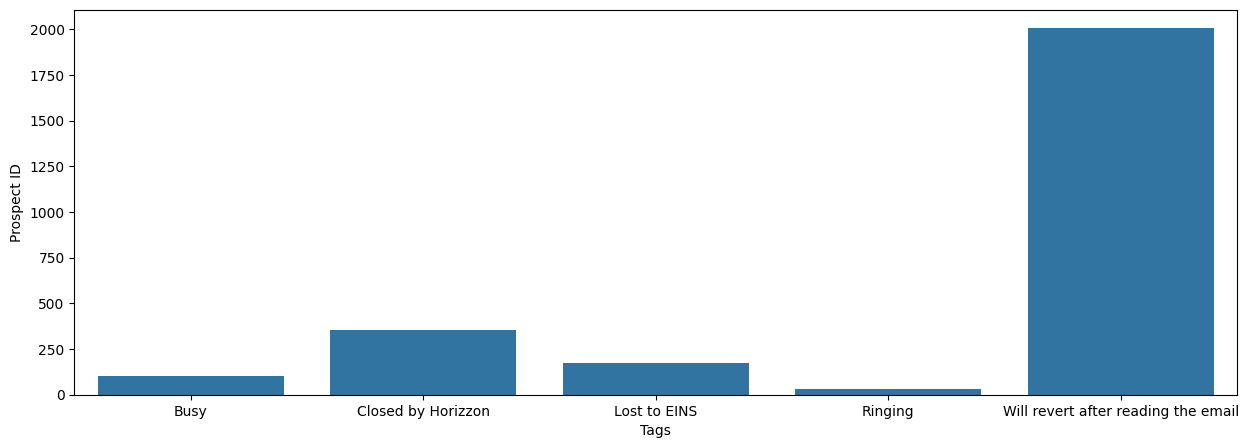

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(data=tags_conv,x='Tags',y='Prospect ID')

In [4]:
df_1=df.copy()

In [5]:
df_1['Lead Quality'].fillna('unknown',inplace=True)

In [6]:
lead_quality=df_1.groupby(['Converted','Lead Quality']).count().reset_index()

In [7]:
lead_quality

,Converted,Lead Quality,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,High in Relevance,34,34,34,34,34,34,34,34,...,34,34,34,28,28,28,28,34,34,34
1,0,Low in Relevance,106,106,106,106,106,106,101,106,...,106,106,106,71,71,71,71,106,106,106
2,0,Might be,381,381,381,378,381,381,371,381,...,381,381,381,212,212,212,212,381,381,381
3,0,Not Sure,826,826,826,824,826,826,821,826,...,826,826,826,478,478,478,478,826,826,826
4,0,Worst,589,589,589,589,589,589,589,589,...,589,589,589,259,259,259,259,589,589,589
5,0,unknown,3743,3743,3743,3741,3743,3743,3726,3743,...,3743,1404,2477,2066,2066,2066,2066,3743,3743,3743
6,1,High in Relevance,603,603,603,598,603,603,563,603,...,603,603,603,347,347,347,347,603,603,603
7,1,Low in Relevance,477,477,477,477,477,477,455,477,...,477,477,477,281,281,281,281,477,477,477
8,1,Might be,1179,1179,1179,1167,1179,1179,1162,1179,...,1179,1179,1179,636,636,636,636,1179,1179,1179
9,1,Not Sure,266,266,266,266,266,266,266,266,...,266,266,266,127,127,127,127,266,266,266


<Axes: xlabel='Lead Quality', ylabel='Prospect ID'>

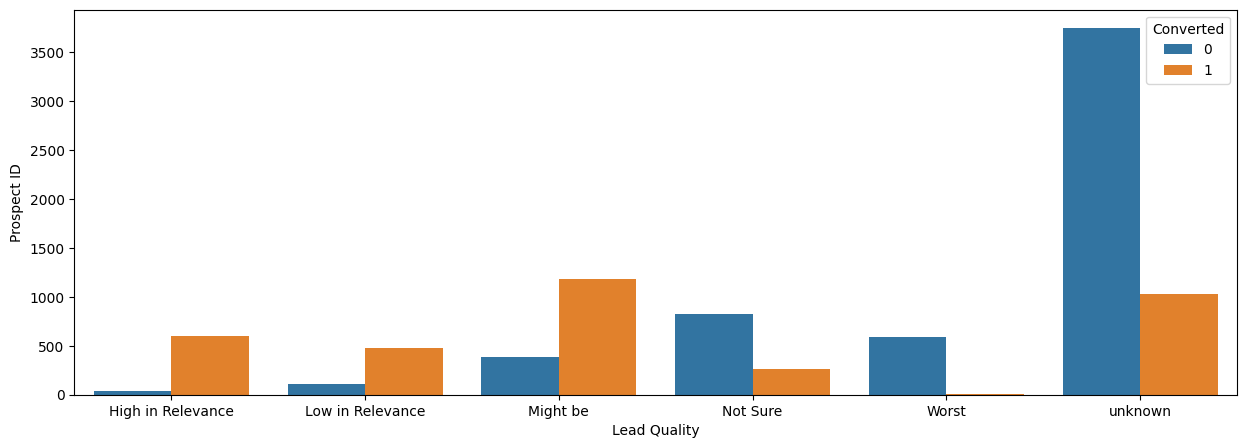

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=lead_quality,x='Lead Quality',y='Prospect ID',hue='Converted')

In [40]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
df_1['Lead Profile'].fillna("unknown",inplace=True)

In [42]:
Lead_profile=df_1.groupby(['Converted','Lead Profile']).count().reset_index()

<Axes: xlabel='Lead Profile', ylabel='Prospect ID'>

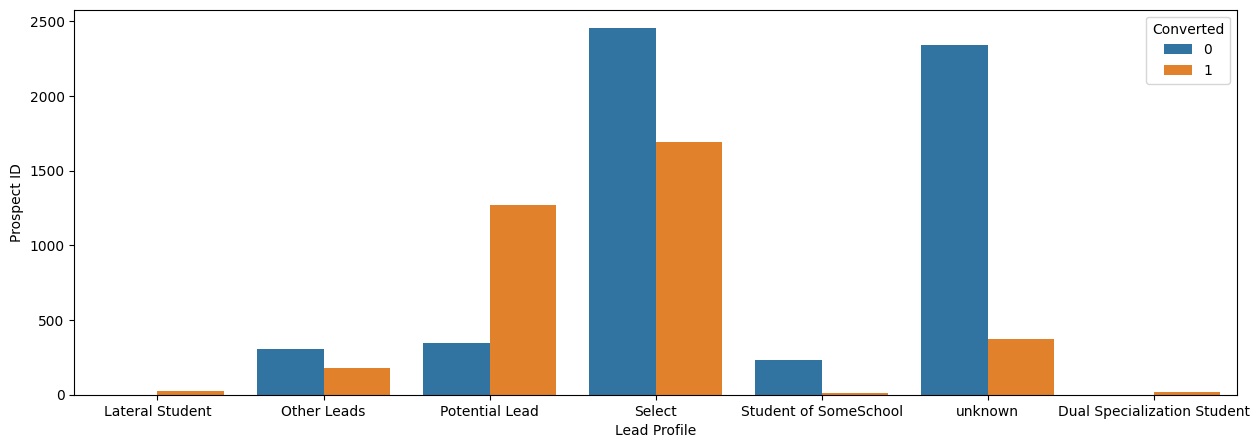

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data=Lead_profile,x='Lead Profile',y='Prospect ID',hue='Converted')

In [44]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
df['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [46]:
df['Asymmetrique Activity Index'].isnull().sum()

4218

In [47]:
df.groupby(['Converted','Asymmetrique Activity Score']).count()

Prospect ID  Lead Number  Lead Origin  \
Converted Asymmetrique Activity Score                                          
0         7.0                                    1            1            1   
          8.0                                    4            4            4   
          9.0                                    9            9            9   
          10.0                                  54           54           54   
          11.0                                  88           88           88   
          12.0                                 173          173          173   
          13.0                                 677          677          677   
          14.0                                1061         1061         1061   
          15.0                                 471          471          471   
          16.0                                 239          239          239   
          17.0                                 332          332          332   
          18.0                                   5            5            5   
1         10.0                                   3            3            3   
          11.0                                   7            7            7   
          12.0                                  23           23           23   
          13.0                                  98           98           98   
          14.0                                 710          710          710   
          15.0                                 822          822          822   
          16.0                                 228          228          228   
          17.0                                  17           17           17   

                                       Lead Source  Do Not Email  Do Not Call  \
Converted Asymmetrique Activity Score                                           
0         7.0                                    1             1            1   
          8.0                                    4             4            4   
          9.0                                    9             9            9   
          10.0                                  54            54           54   
          11.0                                  88            88           88   
          12.0                                 173           173          173   
          13.0                                 675           677          677   
          14.0                                1060          1061         1061   
          15.0                                 469           471          471   
          16.0                                 239           239          239   
          17.0                                 332           332          332   
          18.0                                   5             5            5   
1         10.0                                   3             3            3   
          11.0                                   7             7            7   
          12.0                                  23            23           23   
          13.0                                  98            98           98   
          14.0                                 701           710          710   
          15.0                                 817           822          822   
          16.0                                 228           228          228   
          17.0                                  17            17           17   

                                       TotalVisits  \
Converted Asymmetrique Activity Score                
0         7.0                                    1   
          8.0                                    4   
          9.0                                    9   
          10.0                                  54   
          11.0                                  88   
          12.0                                 173   
          13.0                                 654   
         

In [48]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
df.drop(columns=['Prospect ID','Lead Number','Do Not Email','Do Not Call','Last Activity','Country','Specialization','How did you hear about X Education','What matters most to you in choosing a course',
                'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
                 ,'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','City'
                  ,'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity' ],axis=1,inplace=True)

In [9]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9103 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9103 non-null   float64
 6   What is your current occupation  6550 non-null   object 
 7   Tags                             5887 non-null   object 
 8   Lead Quality                     4473 non-null   object 
 9   Lead Profile                     6531 non-null   object 
 10  Asymmetrique Activity Index      5022 non-null   object 
 11  Asymmetrique Profile Index       5022 non-null   object 
 12  Asymmetrique Activit

In [9]:
df['Asymmetrique Profile Score'].mode()

0    15.0
Name: Asymmetrique Profile Score, dtype: float64

In [10]:
df_2=df.copy()

In [11]:
df_2.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
df_3=df_2[['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']]

In [13]:
df_3.dropna(axis=0,inplace=True)

C:\Users\rames\AppData\Local\Temp\ipykernel_3596\1237017550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.dropna(axis=0,inplace=True)


In [14]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9103 non-null   int64  
 1   TotalVisits                  9103 non-null   float64
 2   Total Time Spent on Website  9103 non-null   int64  
 3   Page Views Per Visit         9103 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 355.6 KB


<Axes: >

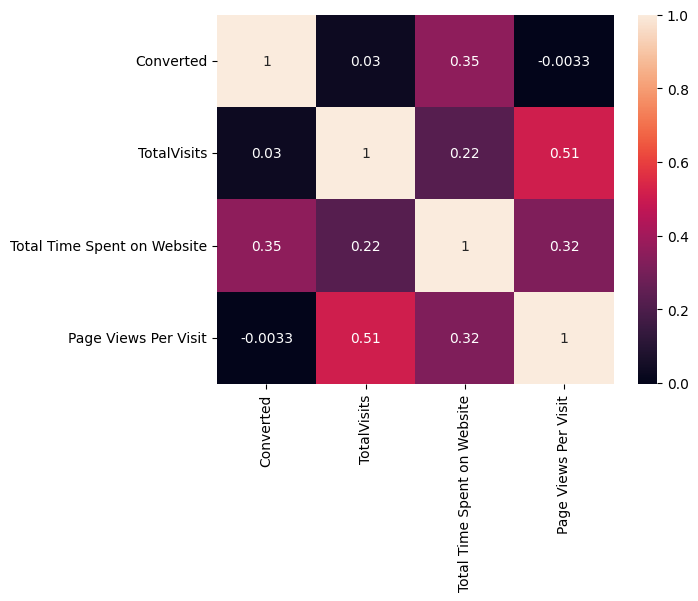

In [58]:
sns.heatmap(df_3.corr(),annot=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [16]:
X=df_3.drop('Converted',axis=1)
y=df_3['Converted']

In [247]:
scaler=StandardScaler()

In [248]:
sca_X=scaler.fit_transform(X)

In [249]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [250]:
model=LogisticRegression()

In [251]:
model.fit(X_train,y_train)

LogisticRegression()

In [252]:
predictions=model.predict(X_test)

In [17]:
from sklearn import metrics

In [254]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1704
           1       0.71      0.45      0.55      1027

    accuracy                           0.72      2731
   macro avg       0.72      0.67      0.67      2731
weighted avg       0.72      0.72      0.71      2731



In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
model=KNeighborsClassifier()

In [257]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [258]:
predictions=model.predict(X_test)

In [259]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1704
           1       0.55      0.74      0.63      1027

    accuracy                           0.67      2731
   macro avg       0.68      0.69      0.67      2731
weighted avg       0.71      0.67      0.68      2731



In [261]:
def error_rate():
    error_rate=[]
    for i in range(1,100):

        model=KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        error_rate.append(np.mean(pred != y_test))
    
    return error_rate

In [262]:
error_rate=error_rate()

Text(0, 0.5, 'Error-Rate')

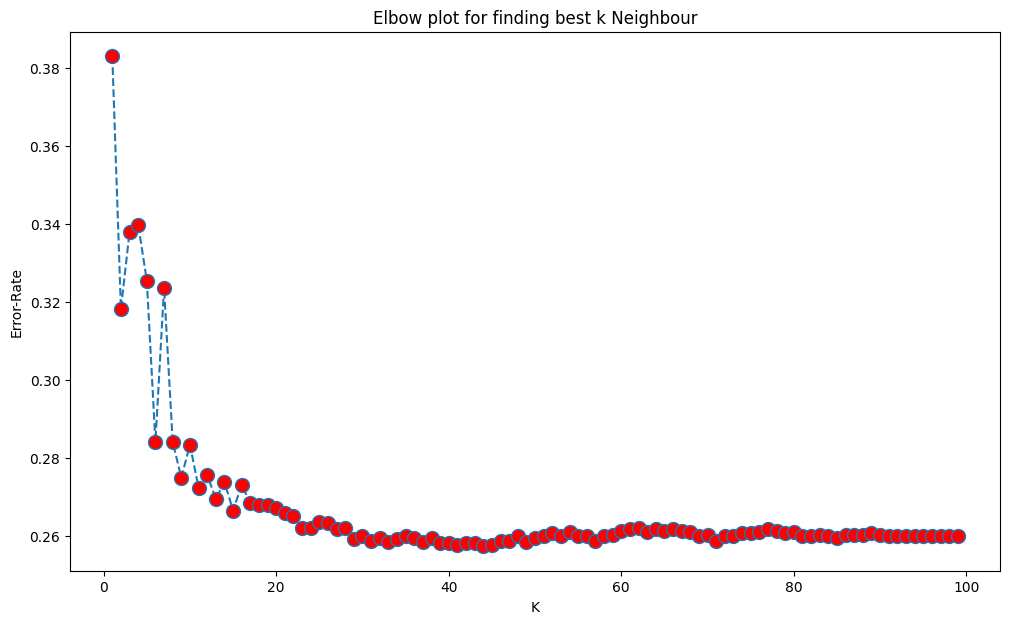

In [263]:
plt.figure(figsize=(12,7))
plt.plot(range(1,100),error_rate,linestyle="--",marker='o',markersize=10,markerfacecolor='red')
plt.title('Elbow plot for finding best k Neighbour')
plt.xlabel('K')
plt.ylabel('Error-Rate')

In [304]:
model=KNeighborsClassifier(n_neighbors=50)

In [305]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [306]:
predictions=model.predict(X_test)

In [307]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1704
           1       0.70      0.54      0.61      1027

    accuracy                           0.74      2731
   macro avg       0.73      0.70      0.71      2731
weighted avg       0.74      0.74      0.73      2731



In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9103 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9103 non-null   float64
 6   What is your current occupation  6550 non-null   object 
 7   Tags                             5887 non-null   object 
 8   Lead Quality                     4473 non-null   object 
 9   Lead Profile                     6531 non-null   object 
 10  Asymmetrique Activity Index      5022 non-null   object 
 11  Asymmetrique Profile Index       5022 non-null   object 
 12  Asymmetrique Activit

In [12]:
df_4=df.copy()

In [13]:
df_4.dropna(axis=0,inplace=True)

In [14]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2361 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      2361 non-null   object 
 1   Lead Source                      2361 non-null   object 
 2   Converted                        2361 non-null   int64  
 3   TotalVisits                      2361 non-null   float64
 4   Total Time Spent on Website      2361 non-null   int64  
 5   Page Views Per Visit             2361 non-null   float64
 6   What is your current occupation  2361 non-null   object 
 7   Tags                             2361 non-null   object 
 8   Lead Quality                     2361 non-null   object 
 9   Lead Profile                     2361 non-null   object 
 10  Asymmetrique Activity Index      2361 non-null   object 
 11  Asymmetrique Profile Index       2361 non-null   object 
 12  Asymmetrique Activity Sco

In [15]:
df_4['Asymmetrique Activity Index']=df_4['Asymmetrique Activity Index'].apply(lambda x : x[3:])
df_4['Asymmetrique Profile Index']=df_4['Asymmetrique Profile Index'].apply(lambda x : x[3:])


In [16]:
df_5=pd.get_dummies(columns=['Lead Origin','Lead Source','What is your current occupation','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index'],drop_first=True,dtype=int,data=df_4)

In [17]:
df_5

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium
0,0,0.0,0,0.00,15.0,15.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1,2.0,1532,2.00,14.0,20.0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1.0,305,1.00,13.0,17.0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,1,2.0,1428,1.00,15.0,18.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,1,2.0,1640,2.00,14.0,20.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5.0,210,2.50,14.0,20.0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9235,1,8.0,1845,2.67,15.0,17.0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9236,0,2.0,238,2.00,14.0,19.0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9237,0,2.0,199,2.00,13.0,20.0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
X=df_5.drop('Converted',axis=1)
y=df_5['Converted']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
clf=RandomForestClassifier()

In [28]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
predictions=clf.predict(X_test)

In [30]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       307
           1       0.98      0.95      0.96       402

    accuracy                           0.96       709
   macro avg       0.96      0.96      0.96       709
weighted avg       0.96      0.96      0.96       709



In [34]:
d=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=["Yes","No"],columns=['Yes','No'])

In [35]:
d

,Yes,No
Yes,298,9
No,19,383


In [517]:
from sklearn.metrics import roc_curve,roc_auc_score

In [518]:
rf_acc=metrics.accuracy_score(predictions,y_test)
rf_prec=metrics.precision_score(predictions,y_test)
rf_recall=metrics.recall_score(predictions,y_test)

In [519]:
rf_acc,rf_prec,rf_recall

(0.9576868829337094, 0.9502487562189055, 0.9744897959183674)

In [520]:
y_score =clf.predict_proba(X_test)[:,1]

In [521]:
fpr_rf,tpr_rf,threshold=roc_curve(y_test,y_score)

In [523]:
rf_auc=roc_auc_score(y_test,y_score)

In [524]:
rf_auc

0.9797024648743254

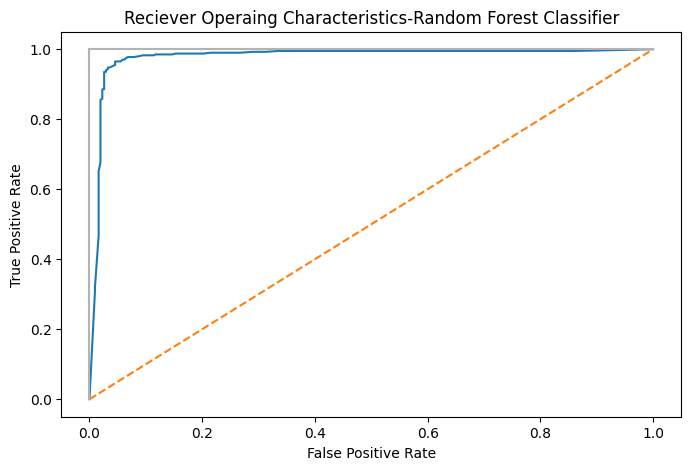

In [448]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Random Forest Classifier')
plt.plot(fpr_rf,tpr_rf)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

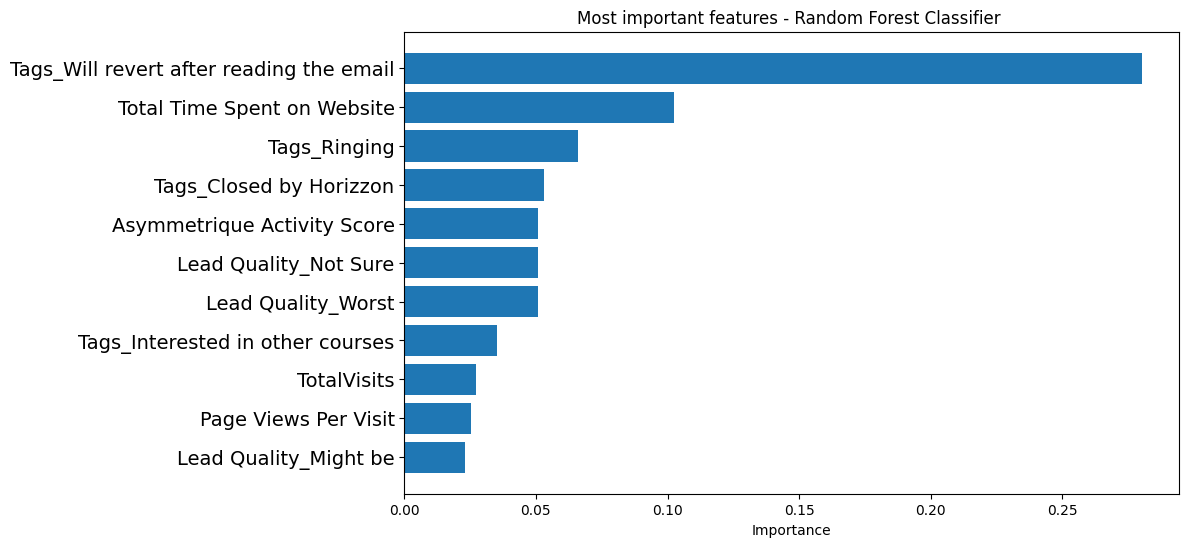

In [449]:
feature_names = X_train.columns
feature_imports = clf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(11, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=1)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest Classifier ')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf=DecisionTreeClassifier()

In [39]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
predictions=clf.predict(X_test)

In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       307
           1       0.95      0.94      0.95       402

    accuracy                           0.94       709
   macro avg       0.94      0.94      0.94       709
weighted avg       0.94      0.94      0.94       709



In [42]:
d=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=["Yes","No"],columns=['Yes','No'])

In [43]:
d

,Yes,No
Yes,286,21
No,23,379


In [530]:
dec_acc=metrics.accuracy_score(predictions,y_test)
dec_prec=metrics.precision_score(predictions,y_test)
dec_recall=metrics.recall_score(predictions,y_test)

In [531]:
dec_acc,dec_prec,dec_recall

(0.9393511988716502, 0.9402985074626866, 0.9521410579345088)

In [532]:
y_score =clf.predict_proba(X_test)[:,1]

In [533]:
fpr_dc,tpr_dc,threshold=roc_curve(y_test,y_score)

In [534]:
auc_dec=roc_auc_score(y_test,y_score)

In [535]:
auc_dec

0.9411533537524105

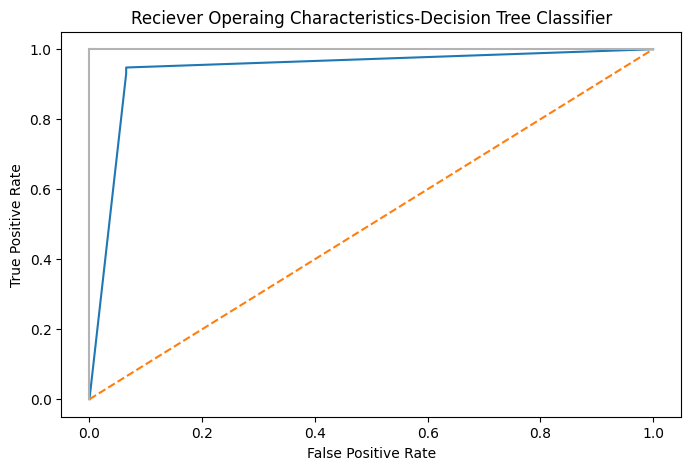

In [461]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Decision Tree Classifier')
plt.plot(fpr_dc,tpr_dc)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

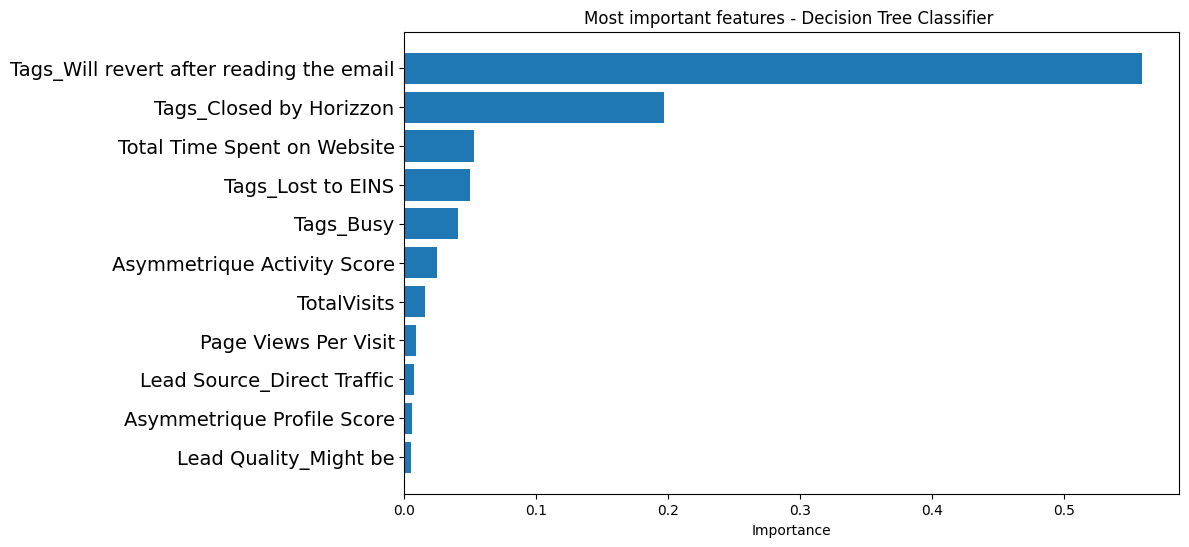

In [462]:
feature_names = X_train.columns
feature_imports = clf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(11, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=1)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree Classifier ')
plt.show()

Text(0.5, 1.0, 'Asymmetrique Profile Score After')

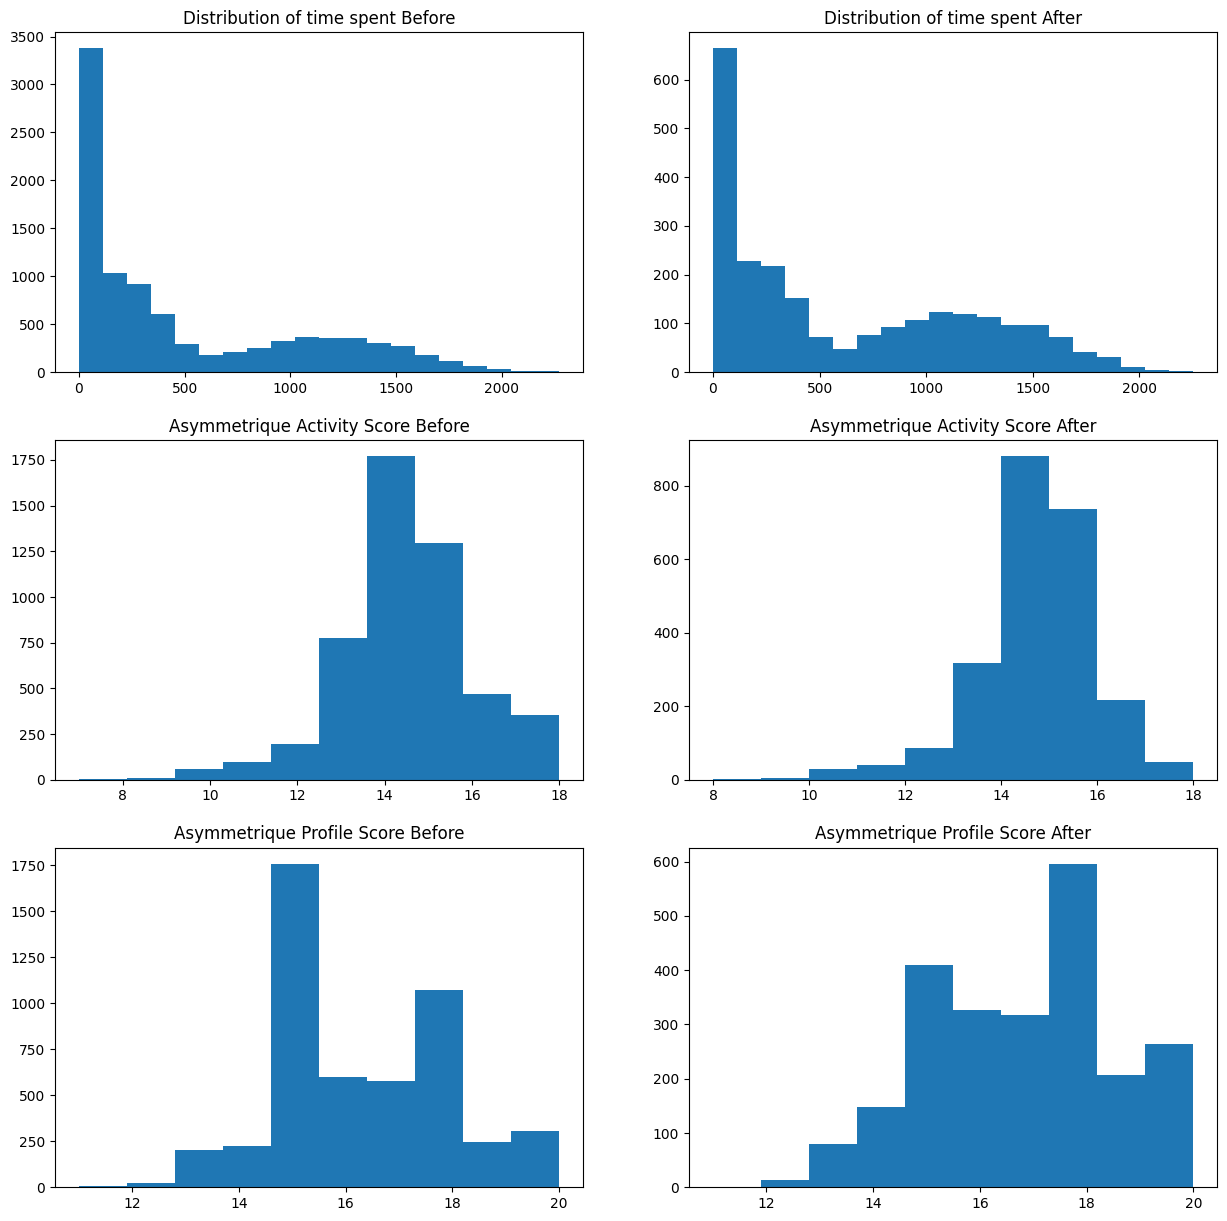

In [388]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)

plt.hist(df['Total Time Spent on Website'],bins=20)

plt.title('Distribution of time spent Before')

plt.subplot(3,2,2)

plt.hist(df_4['Total Time Spent on Website'],bins=20)

plt.title('Distribution of time spent After')

plt.subplot(3,2,3)

plt.hist(df['Asymmetrique Activity Score'],bins=10)

plt.title('Asymmetrique Activity Score Before')

plt.subplot(3,2,4)

plt.hist(df_4['Asymmetrique Activity Score'],bins=10)

plt.title('Asymmetrique Activity Score After')

plt.subplot(3,2,5)

plt.hist(df['Asymmetrique Profile Score'],bins=10)

plt.title('Asymmetrique Profile Score Before')

plt.subplot(3,2,6)

plt.hist(df_4['Asymmetrique Profile Score'],bins=10)

plt.title('Asymmetrique Profile Score After')

Text(0.5, 1.0, 'Distribution of Lead Profile After')

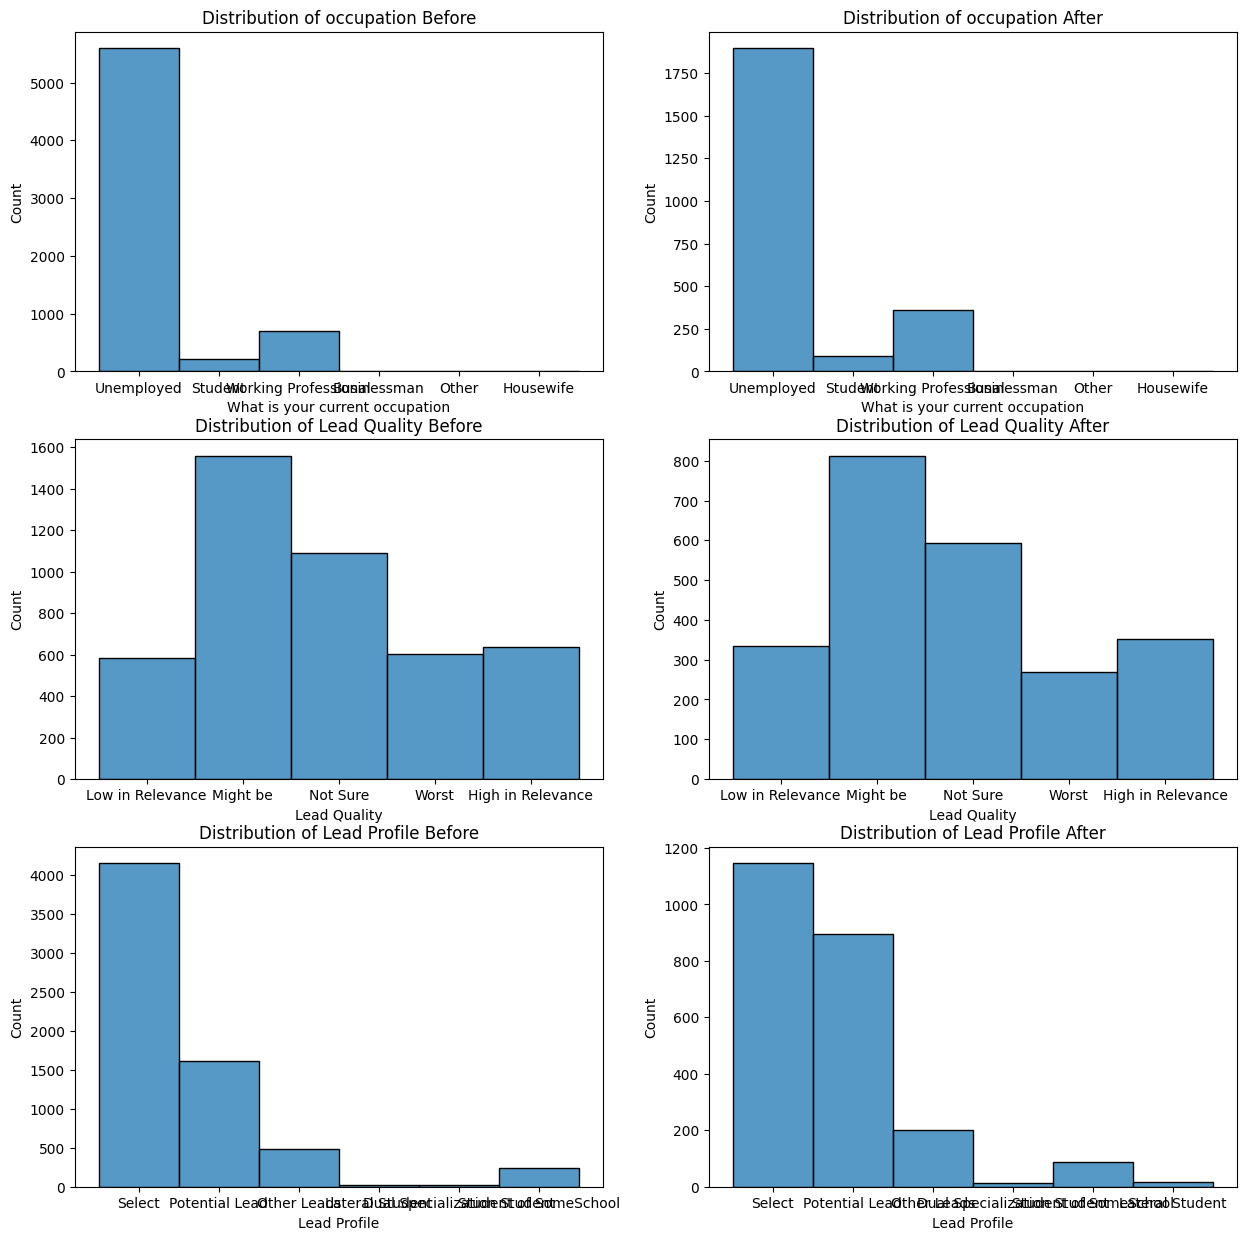

In [434]:
plt.figure(figsize=(15,15))
plt.tight_layout()
plt.subplot(3,2,1)

sns.histplot(df['What is your current occupation'])

plt.title('Distribution of occupation Before')

plt.subplot(3,2,2)

sns.histplot(df_4['What is your current occupation'])

plt.title('Distribution of occupation After')

plt.subplot(3,2,3)

sns.histplot(df['Lead Quality'])

plt.title('Distribution of Lead Quality Before')

plt.subplot(3,2,4)

sns.histplot(df_4['Lead Quality'])

plt.title('Distribution of Lead Quality After')

plt.subplot(3,2,5)

sns.histplot(df['Lead Profile'])

plt.title('Distribution of Lead Profile Before')

plt.subplot(3,2,6)

sns.histplot(df_4['Lead Profile'])

plt.title('Distribution of Lead Profile After')

<Axes: >

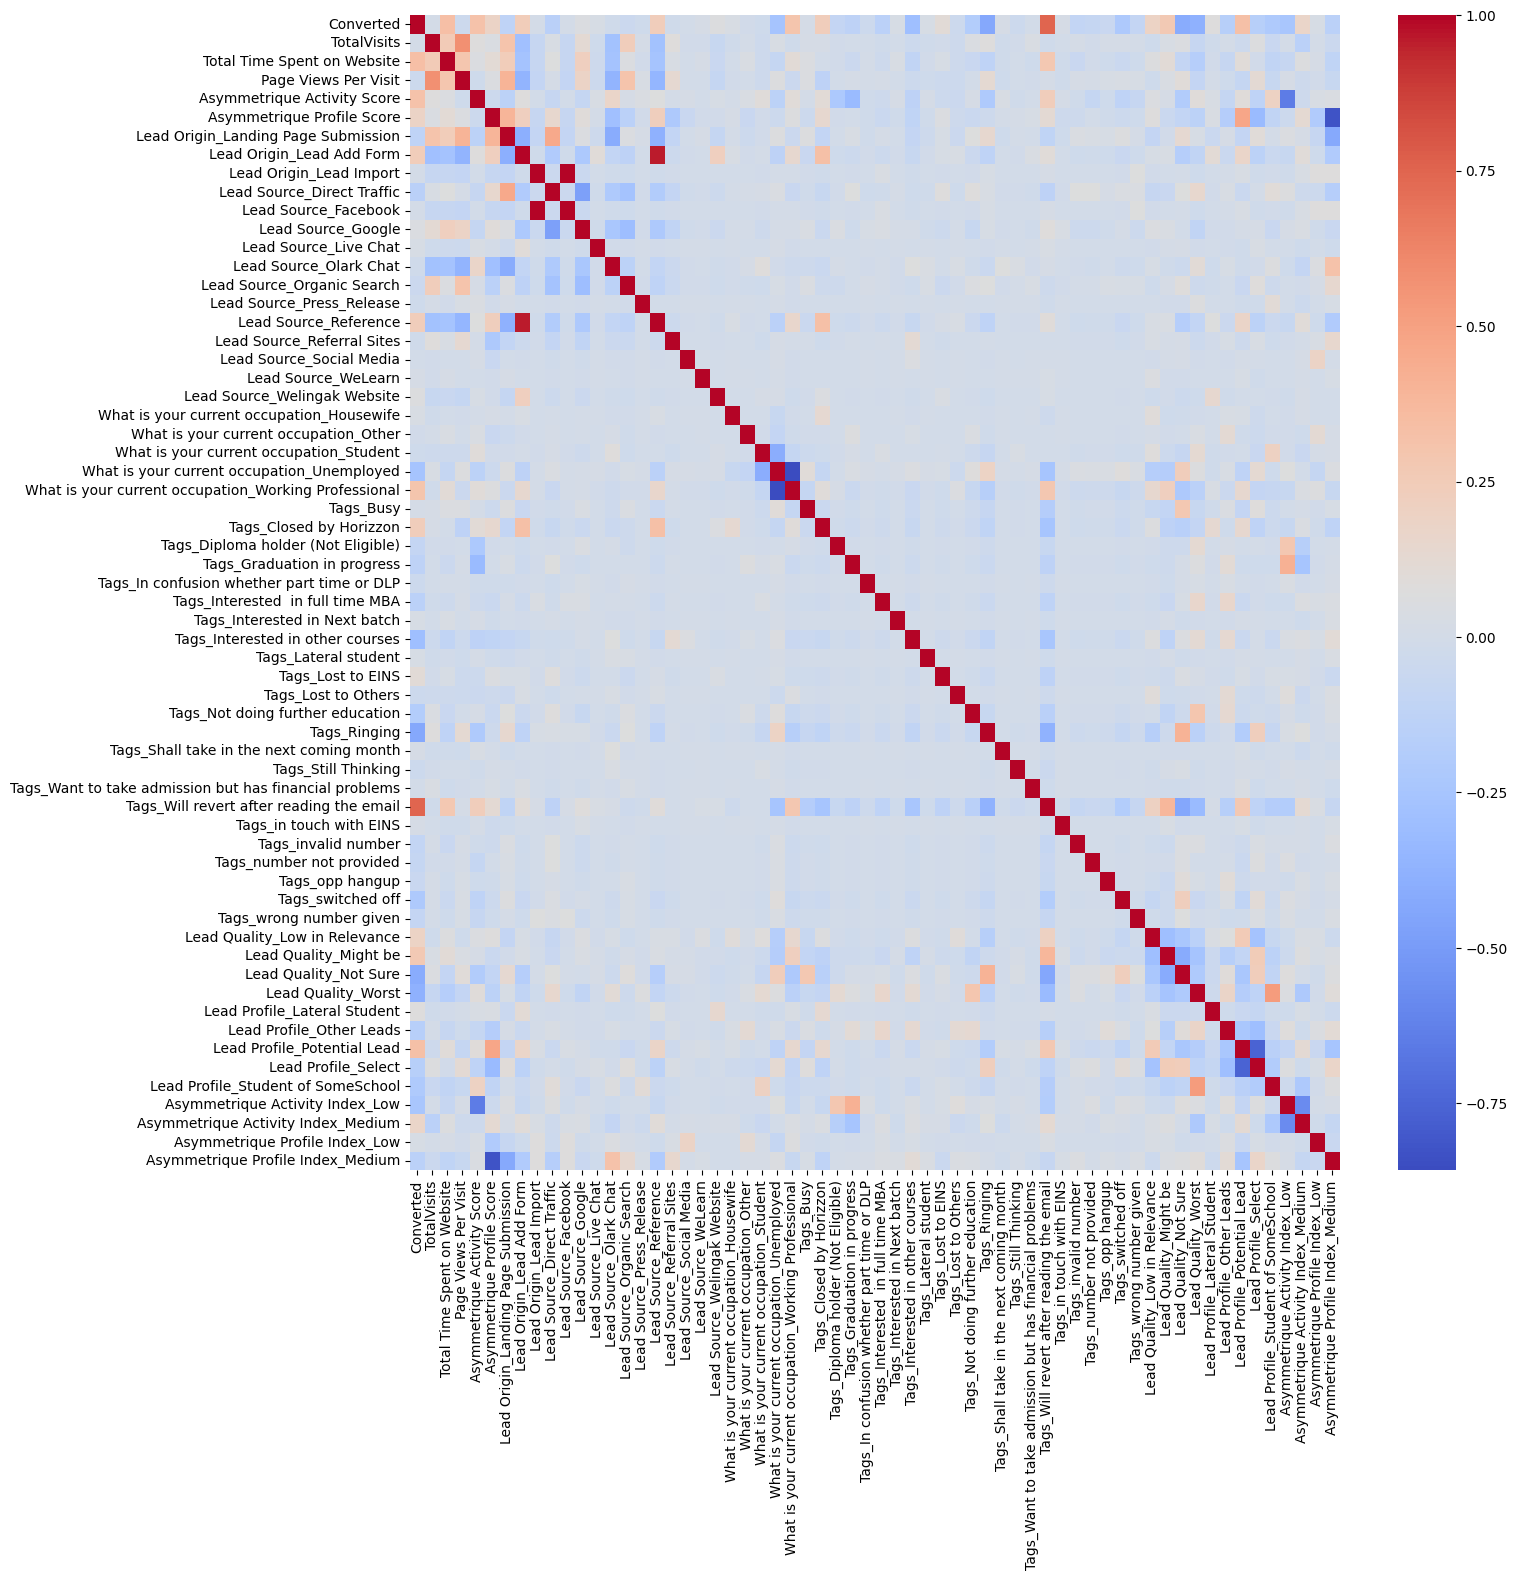

In [473]:
plt.figure(figsize=(15,15))
sns.heatmap(df_5.corr(),cmap='coolwarm')

Text(0.5, 1.0, 'Asymmetrique Profile Scor')

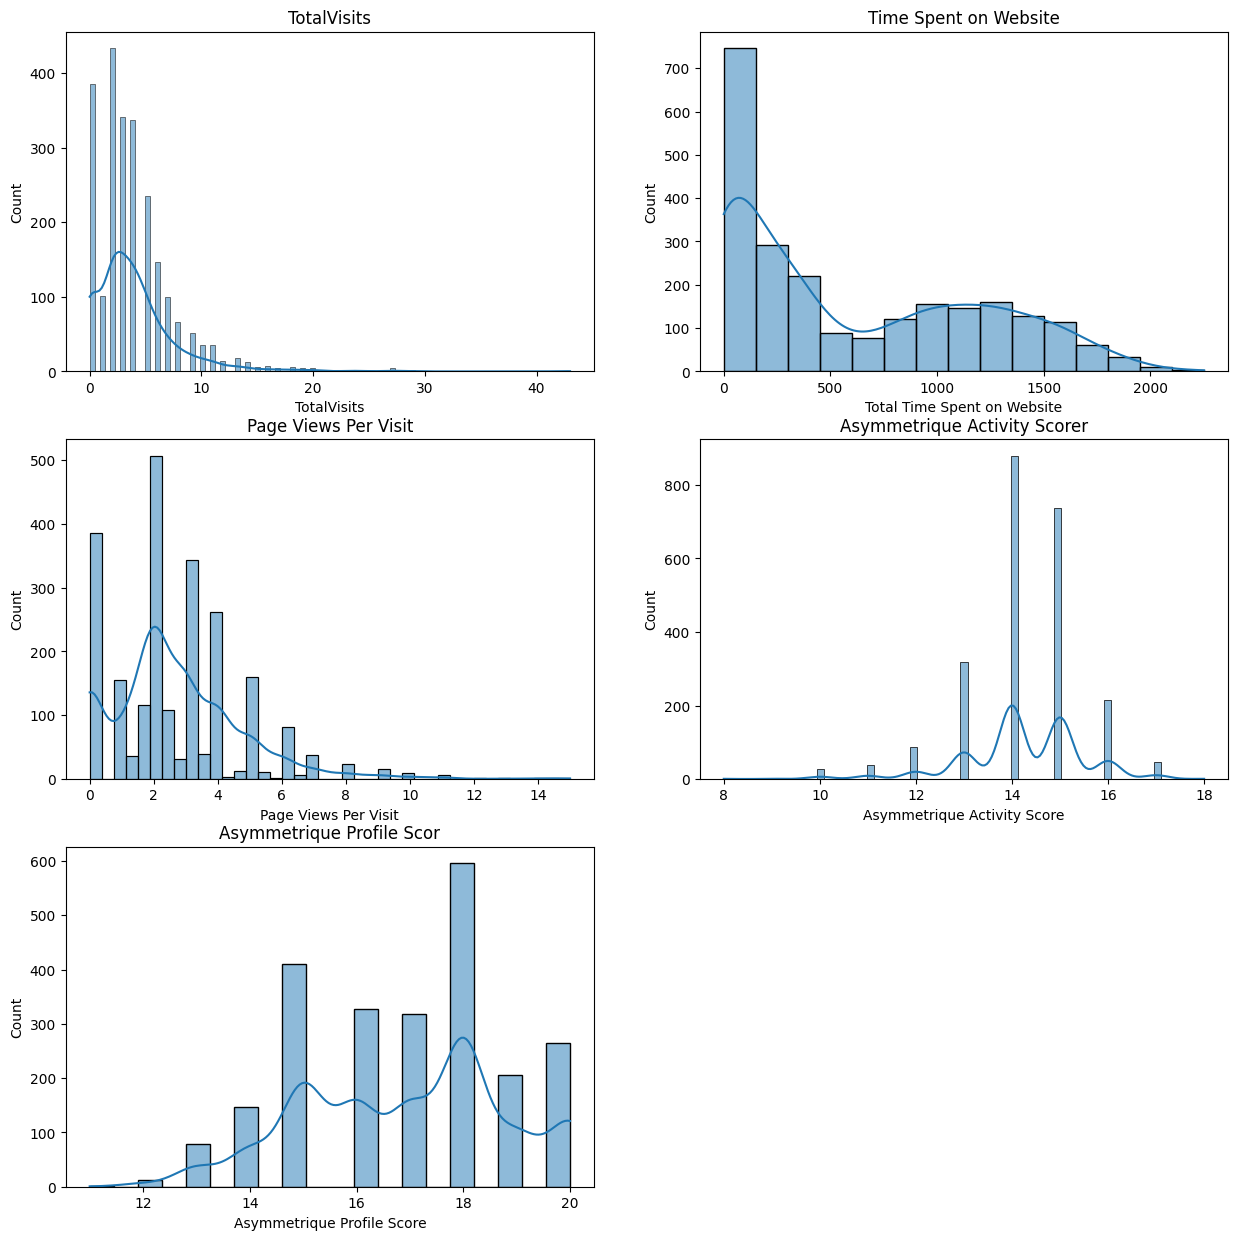

In [90]:
plt.figure(figsize=(15,15))
plt.tight_layout()
plt.subplot(3,2,1)

sns.histplot(df_4['TotalVisits'],kde=True)

plt.title('TotalVisits')

plt.subplot(3,2,2)

sns.histplot(df_4['Total Time Spent on Website'],kde=True)

plt.title('Time Spent on Website')

plt.subplot(3,2,3)

sns.histplot(df_4['Page Views Per Visit'],kde=True)

plt.title('Page Views Per Visit')

plt.subplot(3,2,4)

sns.histplot(df_4['Asymmetrique Activity Score'],kde=True)

plt.title('Asymmetrique Activity Scorer')

plt.subplot(3,2,5)

sns.histplot(df_4['Asymmetrique Profile Score'],kde=True)

plt.title('Asymmetrique Profile Scor')

In [89]:
df_4.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [536]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf=LogisticRegression()

In [45]:
clf.fit(X_train,y_train)

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions=clf.predict(X_test)

In [48]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       307
           1       0.97      0.95      0.96       402

    accuracy                           0.95       709
   macro avg       0.95      0.96      0.95       709
weighted avg       0.96      0.95      0.95       709



In [49]:
d=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=["Yes","No"],columns=['Yes','No'])

In [50]:
d

,Yes,No
Yes,294,13
No,19,383


In [541]:
lg_acc=metrics.accuracy_score(predictions,y_test)
lg_prec=metrics.precision_score(predictions,y_test)
lg_recall=metrics.recall_score(predictions,y_test)

In [542]:
lg_acc,lg_prec,lg_recall

(0.9548660084626234, 0.9527363184079602, 0.9671717171717171)

In [543]:
y_score =clf.predict_proba(X_test)[:,1]

In [544]:
fpr_lg,tpr_lg,threshold=roc_curve(y_test,y_score)

In [545]:
auc_lg=roc_auc_score(y_test,y_score)

In [546]:
auc_lg

0.9788597727972514

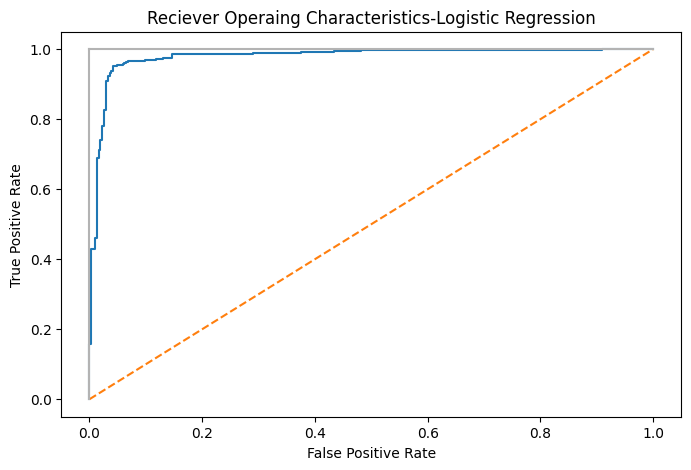

In [494]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Logistic Regression')
plt.plot(fpr_lg,tpr_lg)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
from xgboost import XGBClassifier

In [22]:
clf=XGBClassifier()

In [23]:
clf.fit(X_train,y_train)

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
predictions=clf.predict(X_test)

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [25]:
from sklearn import metrics

In [26]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       307
           1       0.97      0.96      0.96       402

    accuracy                           0.96       709
   macro avg       0.96      0.96      0.96       709
weighted avg       0.96      0.96      0.96       709



In [68]:
d=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=["Yes","No"],columns=['Yes','No'])

In [69]:
d

,Yes,No
Yes,296,11
No,17,385


In [84]:
xgb_acc=metrics.accuracy_score(predictions,y_test)
xgb_prec=metrics.precision_score(predictions,y_test)
xgb_recall=metrics.recall_score(predictions,y_test)

In [85]:
xgb_acc,xgb_prec,xgb_recall

(0.9605077574047954, 0.9577114427860697, 0.9722222222222222)

In [554]:
y_score =clf.predict_proba(X_test)[:,1]

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



In [555]:
fpr_xg,tpr_xg,threshold=roc_curve(y_test,y_score)

In [556]:
auc_xgb=roc_auc_score(y_test,y_score)

In [557]:
auc_xgb

0.975813116826292

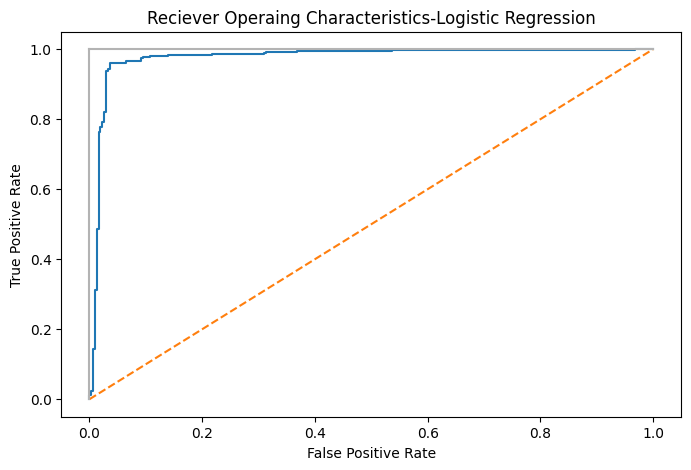

In [508]:
plt.subplots(1,figsize=(8,5))
plt.title('Reciever Operaing Characteristics-Logistic Regression')
plt.plot(fpr_xg,tpr_xg)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

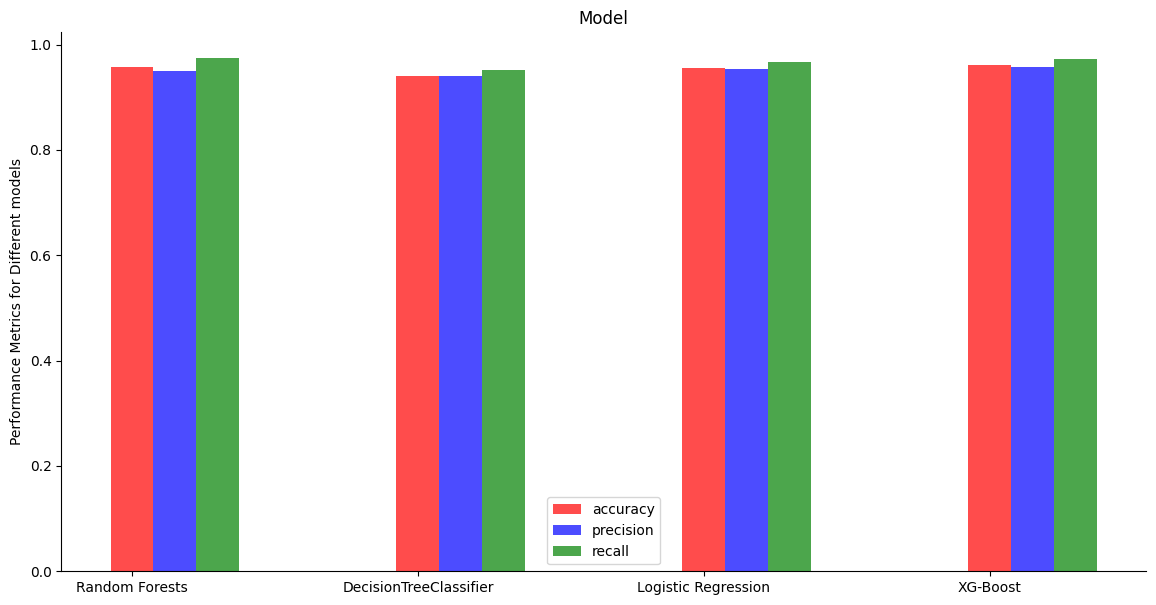

In [558]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Random Forests','DecisionTreeClassifier','Logistic Regression','XG-Boost']
values = [rf_acc,dec_acc,lg_acc,xgb_acc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

           
ax = plt.subplot(111)

models = ['Random Forests','DecisionTreeClassifier','Logistic Regression','XG-Boost']
values = [rf_prec,dec_prec,lg_prec,xgb_prec]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Random Forests','DecisionTreeClassifier','Logistic Regression','XG-Boost']
values = [rf_recall,dec_recall,lg_recall,xgb_recall]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()    

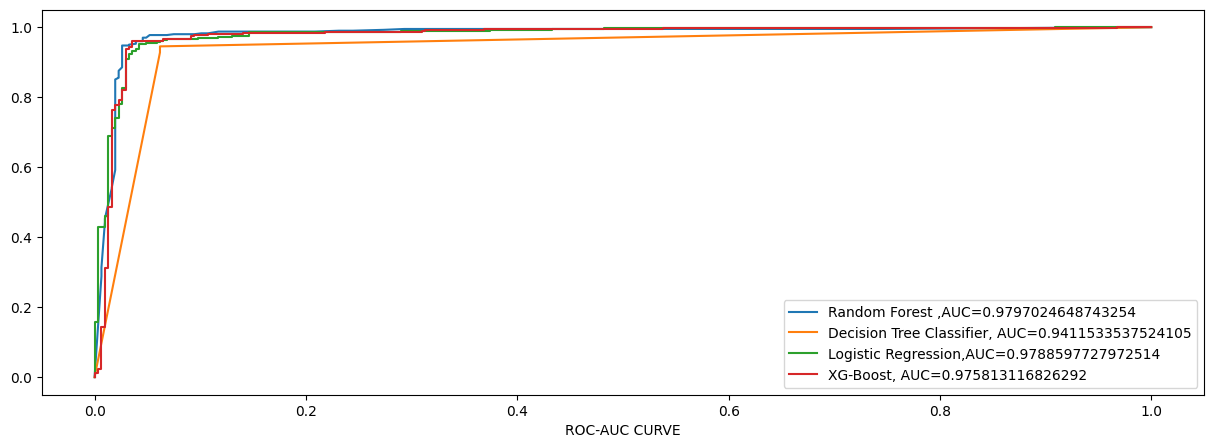

In [560]:
plt.figure(figsize=(15,5)).clf()
plt.plot(fpr_rf,tpr_rf,label="Random Forest ,AUC="+str(rf_auc))
plt.plot(fpr_dc,tpr_dc,label="Decision Tree Classifier, AUC="+str(auc_dec))
plt.plot(fpr_lg,tpr_lg,label="Logistic Regression,AUC="+str(auc_lg))
plt.plot(fpr_xg,tpr_xg,label="XG-Boost, AUC="+str(auc_xgb))
plt.xlabel("ROC-AUC CURVE")

plt.legend()

In [69]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

## Some Important Features:
#### Total Time Spent on Website
#### Page Views Per Visit
#### What is your current occupation?
#### Tags
#### Lead Quality
#### Asymmetrique Activity Score
#### Asymmetrique Profile Score
#### Asymmetrique Activity Index
#### Asymmetrique Profile Index
#### Lead Origin

#### cross validation for best-model

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
score=cross_val_score(clf,X,y,cv=10)

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-review\.venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [34]:
score

array([0.95780591, 0.95762712, 0.94915254, 0.94491525, 0.91949153,
       0.97881356, 0.97457627, 0.94915254, 0.94067797, 0.94491525])

In [32]:
score.mean()

0.9517127941071302